In [159]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from tqdm import tqdm 

Dimensions de X: (100, 2)
Dimensions de y: (100, 1)


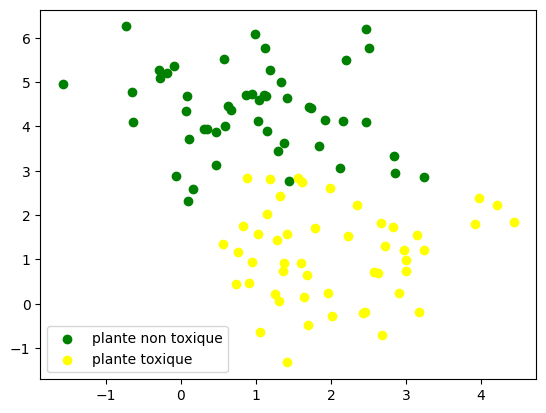

In [87]:
X,y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

# Décale X pour que toutes les valeurs soient positives
# X = X - X.min(axis=0)


print('Dimensions de X:', X.shape)
print('Dimensions de y:', y.shape)

plt.scatter(X[y[:,0]==0, 0], X[y[:,0]==0, 1], c='green', label='plante non toxique')
plt.scatter(X[y[:,0]==1, 0], X[y[:,0]==1, 1], c='yellow', label='plante toxique')
plt.legend()
plt.show()


In [88]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [89]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [90]:
def log_loss(A, y):
    epsilon = 1e-15
    return 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))

In [91]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [92]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [93]:
def predict(X, W, b):
    A = model(X, W, b)
    # print(A)
    return A >= 0.5

In [164]:
def artificial_neuron(X_train, y_train, X_test, y_test, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    W, b = initialisation(X_train)

    train_loss = []
    train_acc = []
    
    test_loss = []
    test_acc = []
    
    for i in tqdm(range(n_iter)):
        
        # Activation
        A = model(X_train, W, b)
        
        if i % 10 == 0:
            # Train
            train_loss.append(log_loss(A, y_train))
            y_pred = predict(X_train, W, b)
            train_acc.append(accuracy_score(y_train, y_pred))
            
            # Test
            A_test = model(X_test, W, b)
            test_loss.append(log_loss(A_test, y_test))
            y_pred = predict(X_test, W, b)
            test_acc.append(accuracy_score(y_test, y_pred))
        
        # Mise à jour des paramètres
        dW, db = gradients(A, X_train, y_train)
        W, b = update(dW, db, W, b, learning_rate)
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Train Loss')
    plt.plot(test_loss, label='Test Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Train Accuracy')
    plt.plot(test_acc, label='Test Accuracy')
    plt.legend()
    plt.show()

    return (W, b)    

0.87


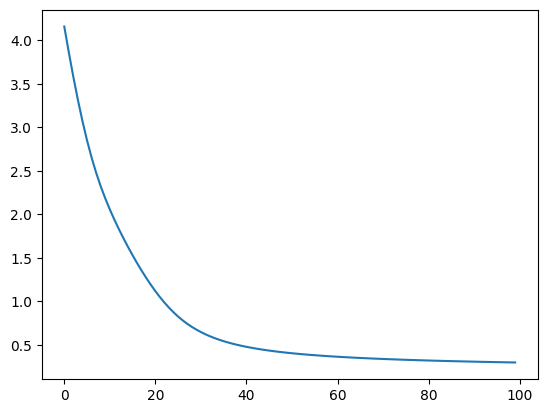

In [95]:
W, b = artificial_neuron(X, y)

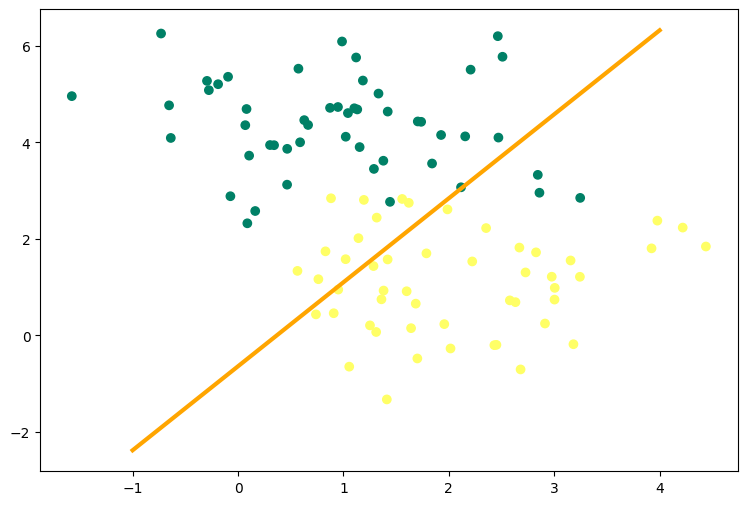

In [96]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X[:,0], X[:, 1], c=y, cmap='summer')

x1 = np.linspace(-1, 4, 100)
x2 = ( - W[0] * x1 - b) / W[1]

ax.plot(x1, x2, c='orange', lw=3)

In [97]:
import plotly.graph_objects as go 

In [98]:
fig = go.Figure(data=[go.Scatter3d( 
    x=X[:, 0].flatten(),
    y=X[:, 1].flatten(),
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color=y.flatten(),                
        colorscale='YlGn',  
        opacity=0.8,
        reversescale=True
    )
)])

fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

In [99]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx0, xx1 = np.meshgrid(X0, X1)
Z = W[0] * xx0 + W[1] * xx1 + b
A = 1 / (1 + np.exp(-Z))

fig = (go.Figure(data=[go.Surface(z=A, x=xx0, y=xx1, colorscale='YlGn', opacity = 0.7, reversescale=True)]))

fig.add_scatter3d(x=X[:, 0].flatten(), y=X[:, 1].flatten(), z=y.flatten(), mode='markers', marker=dict(size=5, color=y.flatten(), colorscale='YlGn', opacity = 0.9, reversescale=True))


fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

In [100]:
import h5py
import numpy as np

In [101]:
def load_data():
    train_dataset = h5py.File('datasets/trainset.hdf5', "r")
    X_train = np.array(train_dataset["X_train"][:]) # your train set features
    y_train = np.array(train_dataset["Y_train"][:]) # your train set labels

    test_dataset = h5py.File('datasets/testset.hdf5', "r")
    X_test = np.array(test_dataset["X_test"][:]) # your train set features
    y_test = np.array(test_dataset["Y_test"][:]) # your train set labels
    
    return X_train, y_train, X_test, y_test

In [102]:
X_train, y_train, X_test, y_test = load_data()

In [103]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500]))


In [104]:
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))

(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100]))


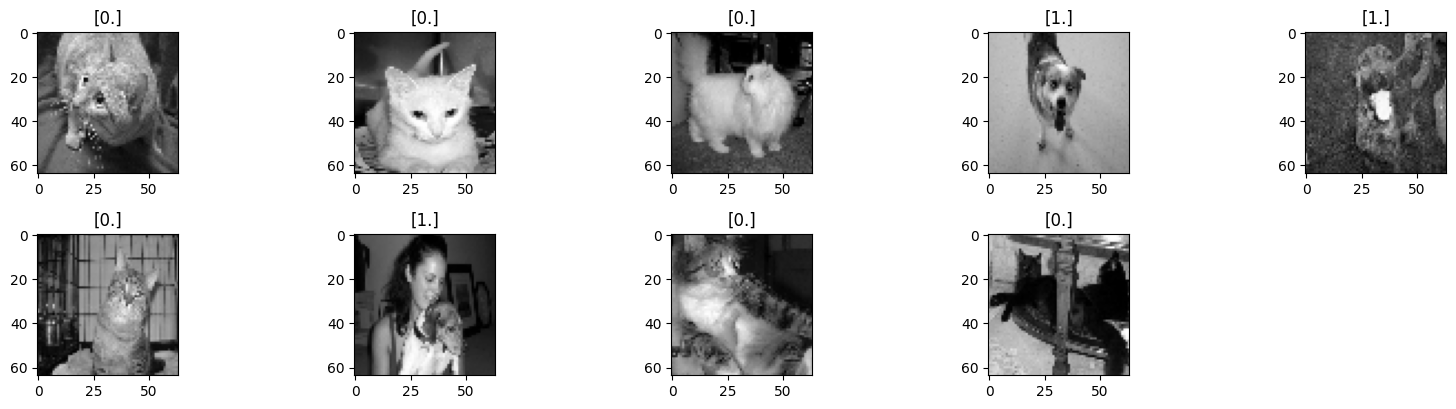

In [105]:
plt.figure(figsize=(16, 8))
for i in range(1, 10):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [137]:
X_train_reshape = X_train.reshape(X_train.shape[0], -1) / X_train.max()
X_train_reshape.shape

(1000, 4096)

In [ ]:
X_test_reshape = X_test.reshape(X_test.shape[0], -1) / X_test.max()
X_test_reshape.shape

(200, 4096)

  0%|          | 0/10000 [00:00<?, ?it/s]

/tmp/ipykernel_4316/1615515945.py:3: RuntimeWarning:

overflow encountered in exp

  0%|          | 4/10000 [00:00<04:22, 38.13it/s]/tmp/ipykernel_4316/1615515945.py:3: RuntimeWarning:

overflow encountered in exp

  0%|          | 11/10000 [00:00<03:20, 49.94it/s]/tmp/ipykernel_4316/1615515945.py:3: RuntimeWarning:

overflow encountered in exp

  0%|          | 21/10000 [00:00<02:22, 69.91it/s]/tmp/ipykernel_4316/1615515945.py:3: RuntimeWarning:

overflow encountered in exp

  0%|          | 32/10000 [00:00<01:58, 84.18it/s]/tmp/ipykernel_4316/1615515945.py:3: RuntimeWarning:

overflow encountered in exp

  0%|          | 42/10000 [00:00<01:51, 89.07it/s]/tmp/ipykernel_4316/1615515945.py:3: RuntimeWarning:

overflow encountered in exp

  1%|          | 60/10000 [00:00<01:56, 85.47it/s]/tmp/ipykernel_4316/1615515945.py:3: RuntimeWarning:

overflow encountered in exp

  1%|          | 69/10000 [00:00<02:02, 81.00it/s]/tmp/ipykernel_4316/1615515945.py:3: RuntimeWarning:

overflow encount

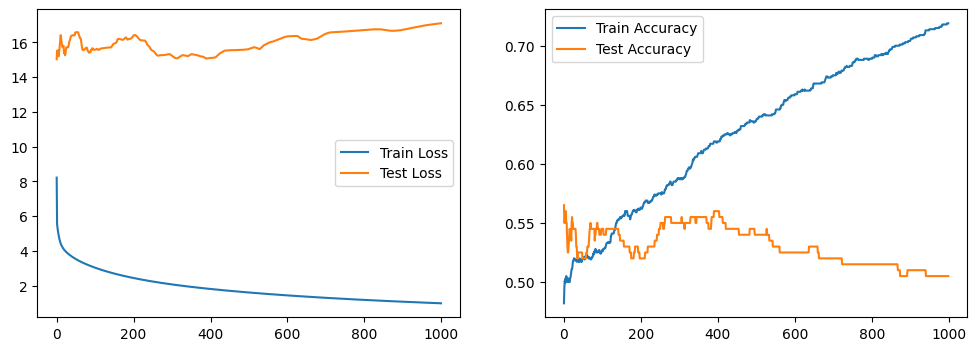

In [166]:
W, b = artificial_neuron(X_train_reshape, y_train, X_test_reshape, y_test, learning_rate=0.01, n_iter=10000)

Experience sur la Normalisation

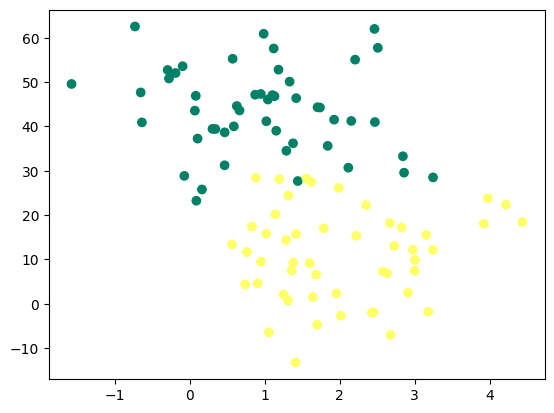

In [133]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
X[:,1] = X[:,1] * 10
y = y.reshape((y.shape[0], 1))

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

In [134]:
lim = 10 
h = 100
W1 = np.linspace(-lim, lim, h)
W2 = np.linspace(-lim, lim, h)

W11, W22 = np.meshgrid(W1, W2)

W_final = np.c_[W11.ravel(), W22.ravel()].T

W_final.shape

(2, 10000)

In [135]:
b = 0
Z = X.dot(W_final) + b
A = 1/ (1 + np.exp(-Z))

epsilon = 1e-15
L = 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon), axis=0).reshape(W11.shape)
L.shape

(100, 100)

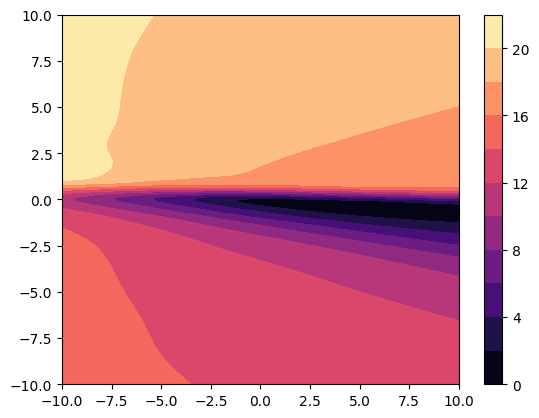

In [136]:
plt.contourf(W11, W22, L, 10, cmap='magma')
plt.colorbar()